<p style="font-size:19px; text-align:left;"><i>Advanced Applications of Generative AI in Actuarial Science: Case Studies Beyond ChatGPT</i></p>
<p style="font-size:25px; text-align:left; font-weight:bold;">Case Study: Data Analysis Multi-Agent System</p>
<p style="font-size:19px; text-align:left; margin-top: -10px; margin-bottom: 15px;">Simon Hatzesberger (<a href="mailto:simon.hatzesberger@gmail.com">simon.hatzesberger@gmail.com</a>), Iris Nonneman (<a href="mailto:irisnonneman@gmail.com">irisnonneman@gmail.com</a>)
<p style="font-style:italic; font-size: 19px">Date: June 22, 2025</p>

<h1 style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">Table of Contents</h1>

[1. Overview and Key Takeaways](#overview_and_key_takeaways)

[2. Environment Setup](#environment_setup)

[3. Data Analysis Multi-Agent System](#data_analysis_multi_agent_system)  
&emsp;&emsp;&emsp;[3.1 Data Analysis Agent Setup](#data_analysis_agent_setup)  
&emsp;&emsp;&emsp;[3.2 Report Generation Agent Setup](#report_generation_agent_setup)  
&emsp;&emsp;&emsp;[3.3 Supervisor Agent Setup](#supervisor_agent_setup)

[4. Evaluation of the Multi-Agent System](#evaluation_of_the_multi_agent_system)  
&emsp;&emsp;&emsp;[4.1 Medical Costs Dataset Evaluation](#medical_costs_dataset_evaluation)  
&emsp;&emsp;&emsp;[4.2 Diabetes Readmission Rates Dataset Evaluation](#diabetes_readmission_rates_dataset_evaluation)

<h1 id="overview_and_key_takeaways" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">1. Overview and Key Takeaways</h1>

At CES 2025, NVIDIA CEO Jensen Huang proclaimed the era of "agentic AI," marking a significant shift toward intelligent systems capable of executing complex tasks with minimal human involvement. Central to this paradigm are AI agents – autonomous software entities that perceive their environment, make decisions, and act to achieve specific goals. Unlike traditional LLMs, which are mainly used to generate text based on input prompts, AI agents can plan, reason, and interact with external tools such as code interpreters, databases, and web search engines, enabling them to complete more intricate and context-aware tasks.

Building on this foundation, multi-agent systems (MAS) consist of multiple AI agents operating collaboratively within a shared environment to solve problems that are beyond the scope of any individual agent. Each agent in a MAS is designed with specialized capabilities and can communicate and coordinate with other agents to achieve collective objectives. This architecture allows complex tasks to be decomposed into manageable subtasks, with each agent contributing its domain expertise, resulting in more efficient and scalable solutions.

The case study presented in the following demonstrates a practical implementation of a minimal yet functional MAS composed of three specialized agents. It processes a tabular dataset by performing exploratory data analysis (EDA) and generating a structured summary report through coordinated agent collaboration. Specifically, our MAS consists of: (1) a data analysis agent responsible for calculating descriptive statistics and generating visualizations; (2) a report generation agent tasked with synthesizing these analytical insights into a coherent narrative; and (3) a supervisor agent coordinating the workflow, overseeing inter-agent communication, and managing task progression. This modular design illustrates how complex tasks can be effectively distributed, solved cooperatively, and scaled through agentic AI.

To demonstrate the broad applicability of the multi-agent framework in the actuarial field, we briefly outline additional MAS use cases. For instance, during extreme weather events like hailstorms, a multi-agent system could involve one agent continuously monitoring real-time weather forecasts and sensor data, another agent retrieving and filtering policyholder location and coverage details from internal databases, a third agent assessing damage likelihood based on actuarial models, and a final agent triggering customized notifications to affected clients. In product development, a MAS might involve one agent gathering competitor product and pricing information, another analyzing internal claims data, a third computing actuarial premiums, and a fourth drafting policy terms in line with corporate guidelines.

The key takeaways for actuarial practice from this case study are as follows:

- **The multi-agent system concept offers a modular and adaptable approach for structuring complex workflows.** By assigning specialized tasks to individual agents, MAS enables seamless substitution or upgrading of agents – such as switching to new LLMs or tools – without disrupting the entire system. Standards like the [Model Context Protocol (MCP)](https://www.anthropic.com/news/model-context-protocol) – an open, interoperable framework for connecting LLMs with external tools and data – further strengthen this flexibility. MAS designs are particularly well-suited for actuarial scenarios where complex problems can be naturally decomposed into discrete, well-defined subtasks.

- **Designing a MAS involves balancing control and flexibility.** Actuaries must decide how strictly to constrain each agent's behavior. On one hand, tight guardrails help to strive for consistency and reproducibility; on the other, too much freedom can lead to unpredictable or misaligned outcomes. In our data analysis MAS, for instance, the data analysis agent received specific instructions on plot types and formatting, while the report generation agent was guided by a fixed output structure – yet interpretive sections remained more open-ended. Finding the right balance between structure and autonomy is essential to maintain both reliability and richness in the system's output.

- **Human–AI collaboration remains important in MAS implementations.** Actuaries can intervene by validating intermediate results either at the handover points between agents or within a single agent's workflow. In more advanced use cases, this oversight can even be embedded programmatically, ensuring human review is part of the process where necessary. This approach improves transparency, trust, and accountability across the MAS pipeline.

- **The design pattern chosen for a MAS also significantly impacts its performance and maintainability.** Whether using a simple supervised setting, as demonstrated above, a hierarchical structure, or a decentralized network of peers, each configuration brings different strengths and limitations. Actuaries designing or evaluating MAS solutions should be aware of these patterns and select the most appropriate architecture for their use case, factoring in coordination needs, system complexity, and required oversight.

- **Multi-agent systems represent a rapidly evolving field.** Recent examples like Manus AI – a fully autonomous system capable of planning and executing complex online tasks end-to-end – and OpenAI's Operator, which autonomously interacts with web browsers to complete real-world tasks, demonstrate how MAS can now operate software autonomously. These developments open exciting possibilities for actuaries, such as enabling MAS to directly interact with actuarial software.

The remainder of this notebook is organized as follows. [Section 1](#overview_and_key_takeaways) provides an overview of the case study along with key takeaways. [Section 2](#environment_setup) handles the environment setup, including secure configuration of API keys and utility functions for rendering agent messages during execution. [Section 3](#data_analysis_multi_agent_system) details the design of a data analysis multi-agent system. It introduces the Data Analysis Agent ([Subsection 3.1](#data_analysis_agent_setup)), followed by the Report Generation Agent ([Subsection 3.2](#report_generation_agent_setup)), and concludes with the Supervisor Agent ([Subsection 3.3](#supervisor_agent_setup)), which orchestrates the overall workflow. [Section 4](#evaluation_of_the_multi_agent_system) evaluates the system's performance across two datasets: the Medical Costs Dataset ([Subsection 4.1](#medical_costs_dataset_evaluation)) and the Diabetes Readmission Rates Dataset ([Subsection 4.2](#diabetes_readmission_rates_dataset_evaluation)).


<h1 id="environment_setup" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">2. Environment Setup</h1>

We begin by importing the necessary modules, organized by functionality to improve clarity. These include utilities for data handling, visualization, and agent orchestration.

In [1]:
# System and environment utilities
import os
import getpass
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utility for downloading datasets directly from Kaggle
import kagglehub

# Type annotations
from typing import Dict, Any, List

# Notebook display utilities
from IPython.display import display, Image, Markdown

# Core LangChain/LangGraph imports for agent creation and messaging
from langchain_core.messages import convert_to_messages
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor
from langchain.chat_models import init_chat_model

# External search tool for web-based column definitions
from langchain_tavily import TavilySearch

# Python REPL tool for dynamic code execution within agents
from langchain_experimental.tools.python.tool import PythonREPLTool

c:\Users\simon\Meine Ablage\AKTUAR\EAJ\GenAI-Actuarial-UseCases\1_Notebooks\Multi-Agent System\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


To enable our AI agents in the following sections, we need access to OpenAI's LLMs and Tavily's web search API. We therefore attempt to load the `OPENAI_API_KEY` and `TAVILY_API_KEY` from operating system environment variables – or, if they are not already set, prompt the user to enter them manually.

In [2]:
# Prompt for and set environment variables if they are not already defined
def _set_if_undefined(var: str):
    """
    Check if the environment variable `var` exists. 
    If not, prompt the user to enter its value securely and set it.
    """
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}: ")

# Ensure required API keys are available before proceeding
_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

Below are helper functions to display agent messages and updates in a readable format. These utilities convert internal message objects into human-friendly representations, making it easier to follow communication between agents during execution.

In [3]:
def pretty_print_message(message, indent=False):
    """
    Convert a message object to its pretty HTML representation and print it.
    If `indent` is True, add a tab before each line to indicate nesting in subgraphs.
    """
    # Get the HTML-formatted representation of the message
    pretty_message = message.pretty_repr(html=True)

    # If no indentation is needed, print directly
    if not indent:
        print(pretty_message)
        return

    # Otherwise, indent each line with a tab character
    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    """
    Display updates from one or more agent nodes (or subgraphs) in readable form.
    - If `update` is a tuple, it represents a subgraph update: skip parent updates
      and label output with the subgraph ID.
    - For each node update, convert raw message data into message objects, then
      print either all messages or only the last one (if `last_message=True`).
    """
    is_subgraph = False

    # Detect and handle subgraph updates: update is a tuple (namespace, data)
    if isinstance(update, tuple):
        ns, update = update
        # Skip printing if this is the top-level graph (empty namespace)
        if len(ns) == 0:
            return

        # Extract subgraph ID to label the output
        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    # Iterate over each node's update dictionary
    for node_name, node_update in update.items():
        # Label the node update, indent if this belongs to a subgraph
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        # Convert raw update data to message objects
        messages = convert_to_messages(node_update["messages"])
        # Optionally restrict to the last message only
        if last_message:
            messages = messages[-1:]

        # Print each message with appropriate indentation
        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")


We next turn to building our implementation of a data analysis multi-agent system, showcasing how multiple specialized agents can collaborate to perform exploratory data analysis and reporting.

<h1 id="data_analysis_multi_agent_system" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">3. Data Analysis Multi-Agent System</h1>

In this section, we develop a data analysis multi-agent system that is powered by LLMs from OpenAI and orchestrated via the LangGraph framework from LangChain, which supports node-based agent workflows. Each agent is powered by a distinct LLM variant selected for its task-specific strengths – for example, GPT-4.1 for code generation and o1 for text synthesis and plot interpretation. In addition to using general-purpose models, task-specific fine-tuned models can also be integrated where domain adaptation or adherence to company-specific language and tone is essential.

In the subsections that follow, we describe the role, behavior, and implementation of each agent – covering both their initialization logic and their coordination within the overall system.

<h1 id="data_analysis_agent_setup"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    3.1 Data Analysis Agent Setup
    <a class="anchor-link"
       href="#data_analysis_agent_setup"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid; margin-top: 10px;">
</h1>

The `data_analysis_agent` is powered by GPT-4.1, which is known for its strong code generation and execution abilities. It receives a tabular dataset and performs a basic EDA, including calculation of descriptive statistics and creation of standard visualizations (e.g., boxplots, bar charts). The agent is equipped with a set of plotting functions and a Python code execution environment, enabling it to generate visualizations and compute results dynamically.

The functions defined below support key exploratory data analysis (EDA) tasks for any given CSV file. They handle computing descriptive statistics for numerical features, counting missing values, and generating suitable visualizations – such as boxplots and bar charts with white backgrounds and black outlines. These functions will later be equipped to the data analysis agent as tools.

In [4]:
def get_data_head(path: str, n: int = 10) -> List[Dict[str, Any]]:
    """
    Return the first `n` rows of the CSV as a list of dicts.
    """
    return pd.read_csv(path).head(n).to_dict(orient="records")


def describe_numerical(path: str) -> Dict[str, Dict[str, float]]:
    """
    Load the CSV at path, select numeric columns, and return their descriptive statistics 
    (count, mean, std, min, quartiles, max) as a nested dictionary.
    """
    df = pd.read_csv(path)
    # Keep only columns with numeric dtypes
    num_df = df.select_dtypes(include="number")
    # Use pandas .describe(), then convert to a dict for JSON‐friendly output
    return num_df.describe().to_dict()


def describe_categorical(path: str) -> Dict[str, Dict[str, int]]:
    """
    Load the CSV at path, identify categorical columns, and return value counts 
    for each as a dictionary mapping category → count.
    """
    df = pd.read_csv(path)
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
    result: Dict[str, Dict[str, int]] = {}
    for col in cat_cols:
        # value_counts(dropna=False) counts NaNs as well
        result[col] = df[col].value_counts(dropna=False).to_dict()
    return result


def check_missing(path: str) -> Dict[str, int]:
    """
    Return count of missing values per column in the CSV.
    """
    return pd.read_csv(path).isna().sum().to_dict()


def plot_numeric_boxplot(
    path: str,
    column: str,
    figsize: tuple = (8, 4),
    dpi: int = 300,
) -> str:
    """
    Create and save a simple boxplot for a numeric column, adjusting layout.
    The plot is stored in a 'plots' subfolder relative to the CSV file's directory.
    """
    df = pd.read_csv(path)
    if column not in df.columns or not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"Column '{column}' not found or not numeric")

    # Determine output directory relative to CSV location
    parent_dir = os.path.dirname(path)
    output_dir = os.path.join(parent_dir, "plots")
    os.makedirs(output_dir, exist_ok=True)

    filepath = os.path.join(output_dir, f"{column}_boxplot.png")

    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=df[column].dropna(), ax=ax)
    ax.set_title(f"Boxplot of {column}")

    # Adjust layout to prevent clipping
    fig.tight_layout()
    fig.subplots_adjust(top=0.9, right=0.95, left=0.1)

    fig.savefig(filepath, dpi=dpi, bbox_inches='tight')
    plt.close(fig)
    return filepath


def plot_categorical_barchart(
    path: str,
    column: str,
    output_dir: str = "plots",
    figsize: tuple = (8, 4),
    dpi: int = 300,
) -> str:
    """
    Create and save a simple bar chart for a categorical column, adjusting layout.
    The plot is stored in a 'plots' subfolder relative to the CSV file's directory.
    """
    df = pd.read_csv(path)
    if column not in df.columns or column not in df.select_dtypes(include=["object", "category"]).columns.tolist():
        raise ValueError(f"Column '{column}' not found or not categorical")

    counts = df[column].value_counts(dropna=False)

    # Determine output directory relative to CSV location
    parent_dir = os.path.dirname(path)
    output_dir = os.path.join(parent_dir, "plots")
    os.makedirs(output_dir, exist_ok=True)

    filepath = os.path.join(output_dir, f"{column}_barchart.png")

    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    ax.set_title(f"Bar chart of {column}")
    ax.set_ylabel("Count")

    # Adjust layout to prevent clipping of tick labels
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.25, top=0.9, right=0.95)

    fig.savefig(filepath, dpi=dpi, bbox_inches='tight')
    plt.close(fig)
    return filepath

Below, we define a Python REPL tool that enables the agent to execute arbitrary Python code (e.g., for custom DataFrame operations or ad-hoc plotting) during its reasoning process.

In [5]:
# Instantiate a tool that allows agents to run arbitrary Python code at runtime
python_repl = PythonREPLTool(
    name="python_repl",
    description="Execute arbitrary Python code. Useful for custom DataFrame manipulations, exploratory analysis, or generating plots on the fly."
)

One possible way to initialize the `data_analysis_agent` is shown in the following code snippet. The initialization function specifies the underlying language model, the set of tools available to the agent (e.g., statistical plotting functions, code interpreter), and a detailed prompt that defines the agent's behavior and output format.

In [6]:
# Construct the data_analysis_agent
data_analysis_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[get_data_head, describe_numerical, describe_categorical, check_missing,
           plot_numeric_boxplot, plot_categorical_barchart, python_repl],
    prompt=(
        "You are a data analysis agent. Your job is:\n"
        "1. Load the CSV via get_data_head(path, n=10) to obtain the first ten rows as `head_rows`.\n"
        "2. Compute numerical stats (describe_numerical) and categorical stats (describe_categorical).\n"
        "3. Check for missing values (check_missing).\n"
        "4. Create boxplots (plot_numeric_boxplot) and bar charts (plot_categorical_barchart).\n"
        "5. If any custom computation is required (pivot tables, new plots, conditional filtering, etc.), "
        "   call python_repl with the necessary Python code.\n\n"
        "Return a JSON object with keys:\n"
        "  - head_rows (List[Dict])\n"
        "  - numerical_stats (Dict)\n"
        "  - categorical_stats (Dict)\n"
        "  - missing_summary (Dict)\n"
        "  - boxplot_paths (List[str])\n"
        "  - barchart_paths (List[str])\n"
        "Do not include any extra commentary - just valid JSON.\n"
        "If you need to run custom Python code (e.g., advanced filtering, custom visualization), "
        "use python_repl by writing code like:\n"
        "```python\n"
        "# Example:\n"
        "import pandas as pd\n"
        "df = pd.read_csv(data_path)\n"
        "subset = df[df['AGE'] > 50]\n"
        "```"
    ),
    name="data_analysis_agent"
)

<h1 id="report_generation_agent_setup"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    3.2 Report Generation Agent Setup
    <a class="anchor-link"
       href="#report_generation_agent_setup"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid; margin-top: 10px;">
</h1>

The `report_generation_agent` uses the o1 model, which is well-suited for tasks involving structured text generation, visual interpretation, and analytical reasoning. It interprets the plots and statistical outputs provided by the `data_analysis_agent` and generates a structured report summarizing the findings. This agent is also equipped with a web search tool to retrieve metadata or contextual information about public datasets, as well as a report generation function that enforces structural guidelines for the resulting output.

The following function assembles a complete Markdown report for a dataset by combining column descriptions, a data preview, missing‐value counts, and descriptive statistics with inline plots. Given paths to the CSV, statistics dictionaries, plot file paths, and human‐provided column descriptions, it formats each section – embedding boxplots under numeric summaries and bar charts under categorical summaries – into a single Markdown string.

In [7]:
def generate_markdown_report(
    head_rows: List[Dict[str, Any]],
    numerical_stats: Dict[str, Dict[str, Any]],
    categorical_stats: Dict[str, Dict[str, int]],
    missing_summary: Dict[str, int],
    boxplot_paths: List[str],
    barchart_paths: List[str],
    column_descriptions: Dict[str, str],
) -> str:
    """
    Generates a Markdown report that includes:
      1. Column Descriptions
      2. Data Preview (first ten rows, no missing-values commentary here)
      3. Missing Values Summary
      4. Descriptive Statistics, with plots embedded immediately under each column
         - For numeric columns: insert its boxplot after the stats table
         - For categorical columns: insert its barchart after the counts table
    """

    # Render the first ten rows from head_rows
    head_md = pd.DataFrame(head_rows).to_markdown()
    
    md_lines: List[str] = []

    # Column Descriptions
    md_lines.append("# Dataset Analysis Report\n")
    md_lines.append("## 1. Column Descriptions\n")
    for col, desc in column_descriptions.items():
        md_lines.append(f"- **{col}**: {desc}\n")
    md_lines.append("\n")

    # Data Preview (first ten rows, no commentary about missing values) 
    md_lines.append("## 2. Data Preview (first ten rows)\n")
    md_lines.append("```\n" + head_md + "\n```\n")

    # Missing Values Summary (all missing-values commentary here)
    md_lines.append("## 3. Missing Values Summary\n")
    for col, cnt in missing_summary.items():
        md_lines.append(f"- **{col}**: {cnt}\n")
    md_lines.append("\n")

    # Descriptive Statistics with Embedded Plots
    md_lines.append("## 4. Descriptive Statistics and Plots\n")

    # Numerical Features
    md_lines.append("### 4.1 Numerical Features\n")
    # Build a quick lookup from column_name to boxplot_path
    boxplot_lookup = {}
    for path in boxplot_paths:
        # Extract column name from filename, split on "_boxplot_" :contentReference[oaicite:1]{index=1}
        col_name = os.path.basename(path).split("_boxplot_")[0]
        boxplot_lookup[col_name] = path

    for col, stats in numerical_stats.items():
        md_lines.append(f"#### {col}\n")

        # Stats Table
        md_lines.append("| Metric | Value |\n")
        md_lines.append("|---|---|\n")
        for metric, val in stats.items():
            if isinstance(val, float):
                md_lines.append(f"| {metric} | {val:.2f} |\n")
            else:
                md_lines.append(f"| {metric} | {val} |\n")
        md_lines.append("\n")

        # Embed Boxplot for this numeric column
        if col in boxplot_lookup:
            plot_path = boxplot_lookup[col]
            md_lines.append(f"![{col} Boxplot]({plot_path})\n")
            md_lines.append(f"*Figure: Boxplot of **{col}***\n\n")
        else:
            md_lines.append(f"*Note: No boxplot found for column `{col}`.*\n\n")

    # Categorical Features
    md_lines.append("### 4.2 Categorical Features\n")
    # Build a quick lookup from column_name to barchart_path
    barchart_lookup = {}
    for path in barchart_paths:
        # Extract column name from filename, split on "_barchart_" :contentReference[oaicite:2]{index=2}
        col_name = os.path.basename(path).split("_barchart_")[0]
        barchart_lookup[col_name] = path

    for col, counts in categorical_stats.items():
        md_lines.append(f"#### {col}\n")

        # Counts Table
        md_lines.append("| Category | Count |\n")
        md_lines.append("|---|---|\n")
        for category, count in counts.items():
            md_lines.append(f"| {category} | {count} |\n")
        md_lines.append("\n")

        # Embed Bar Chart for this categorical column
        if col in barchart_lookup:
            plot_path = barchart_lookup[col]
            md_lines.append(f"![{col} Bar Chart]({plot_path})\n")
            md_lines.append(f"*Figure: Bar chart of **{col}***\n\n")
        else:
            md_lines.append(f"*Note: No bar chart found for column `{col}`.*\n\n")

    # Combine all lines into a single Markdown string
    markdown_report = "\n".join(md_lines)
    return markdown_report

Below, we configure the TavilySearch tool to allow agents to perform web lookups (e.g., for column definitions from publicly available datasets), returning up to three results per query.

In [8]:
# Instantiate the TavilySearch tool for querying web content (max 3 results per search)
tavily_search = TavilySearch(max_results=3, topic="general")

Next, we initialize the reporting agent. This agent uses o1 alongside two tools – web search via Tavily and our `generate_markdown_report` function – to enrich column descriptions and wrap the Markdown skeleton with narrative commentary. The prompt guides the agent to retrieve column definitions via web search, assemble a complete report skeleton, and insert contextual introductions and interpretations for each section.

In [9]:
# Construct the report_generation_agent
report_generation_agent = create_react_agent(
    model="openai:o1",
    tools=[tavily_search, generate_markdown_report],
    prompt=(
        "You are a report generation agent for dataset analysis. You will receive a JSON object containing:\n"
        "- head_rows (first ten rows as List[Dict])\n"
        "- numerical_stats (dict of {column: {metric: value}})\n"
        "- categorical_stats (dict of {column: {category: count}})\n"
        "- missing_summary (dict of {column: missing_count})\n"
        "- boxplot_paths (list of strings)\n"
        "- barchart_paths (list of strings)\n\n"
        "Your workflow:\n"
        "1. **Read the column names** from the keys of numerical_stats & categorical_stats.\n"
        "2. **Issue a single web search** to find an online schema or documentation that covers all your column names.\n"
        "   - Build a query by listing the column names generically, for example:\n"
        "       \"Schema documentation for a dataset with columns: <COLUMN1>, <COLUMN2>, <COLUMN3>, ...\"\n"
        "   - Invoke `tavily_search.invoke({\"query\": query_string})` only once.\n"
        "   - From the top result's `results[0]['content']`, extract each column's description (e.g. by matching lines like “<COLUMN_NAME> – <description>”).\n"
        "   - Assemble these into a `column_descriptions` dict mapping each column name to its description.\n"
        "3. Call `generate_markdown_report(head_rows, numerical_stats, categorical_stats, missing_summary, boxplot_paths, barchart_paths, column_descriptions)`.\n"
        "   This function returns a **Markdown skeleton** that:\n"
        "     - Shows the first ten rows under “Data Preview.”\n"
        "     - Lists missing-value counts under “Missing Values Summary.”\n"
        "     - For each numeric column, shows a stats table and immediately embeds its boxplot.\n"
        "     - For each categorical column, shows a counts table and immediately embeds its bar chart.\n"
        "4. **Wrap** that skeleton with LLM-generated narrative (introduction and transitions) as follows:\n"
        "   - Add a short introduction at the very top explaining the dataset's purpose and context.\n"
        "   - Before each major section (Column Descriptions, Data Preview, Missing Values, Descriptive Statistics), write a brief paragraph orienting the reader.\n"
        "   - After each numeric stats table and its boxplot, write 2-3 sentences interpreting what the mean, std, and boxplot reveal about that column (e.g., distribution, outliers).\n"
        "   - After each categorical counts table and its bar chart, write 2-3 sentences discussing dominant categories and their implications.\n"
        "5. Finally, return **only** the completed Markdown report (no JSON or extra commentary).\n"
    ),
    name="report_generation_agent"
)

<h1 id="supervisor_agent_setup"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    3.3 Supervisor Agent Setup
    <a class="anchor-link"
       href="#supervisor_agent_setup"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid; margin-top: 10px;">
</h1>

The `supervisor_agent` coordinates the overall workflow. It determines task completion states, triggers the next agent when appropriate, and manages the flow of intermediate results. For these tasks, the GPT-4.1 mini model is used, offering a strong balance of performance and speed.

The code snippet below demonstrates one possible way to initialize the `supervisor_agent`. This involves specifying the language model, registering the two subordinate agents it coordinates, and providing a prompt that governs its orchestration logic and workflow transitions. This agent takes user input (e.g., "Analyze data.csv and produce a report"), forwards it to the `data_analysis_agent`, waits for its JSON output, and then passes that JSON to the `report_generation_agent`. The supervisor then returns only the completed Markdown report from the reporting agent.

In [10]:
# Construct the supervisor agent
supervisor_agent = create_supervisor(
    model=init_chat_model("openai:gpt-4.1-mini"),
    agents=[data_analysis_agent, report_generation_agent],
    prompt=(
        "You are a supervisor overseeing two agents:\n"
        "  1. **data_analysis_agent**: Loads a CSV, computes descriptive stats (numeric & categorical), checks missing values, and creates boxplots & bar charts. It returns a JSON with:\n"
        "       - dataset_path (string)  \n"
        "       - numerical_stats (dict)  \n"
        "       - categorical_stats (dict)  \n"
        "       - missing_summary (dict)  \n"
        "       - boxplot_paths (list of strings)  \n"
        "       - barchart_paths (list of strings)  \n"
        "  2. **report_generation_agent**: Takes that JSON, looks up each column’s meaning online, and generates a complete Markdown report—**including all narrative interpretations** (introduction, commentary, insights). It should not produce raw tables itself.\n\n"
        "Workflow:\n"
        "- When the user asks (for example, “Analyze data.csv and produce a report”), first route the request to **data_analysis_agent** with a clear set of instructions to produce the JSON described above.\n"
        "- Once **data_analysis_agent** returns its JSON, immediately hand off that JSON to **report_generation_agent**.\n"
        "- Finally, return exactly the Markdown string output by **report_generation_agent** (no additional commentary).\n"
    ),
    add_handoff_back_messages=True,
    output_mode="full_history",
    supervisor_name="supervisor_agent"
).compile()

The following code displays the multi-agent system's workflow graph as a Mermaid diagram, allowing you to visualize how the `data_analysis_agent` and `report_generation_agent` interact under the `supervisor_agent`'s orchestration:

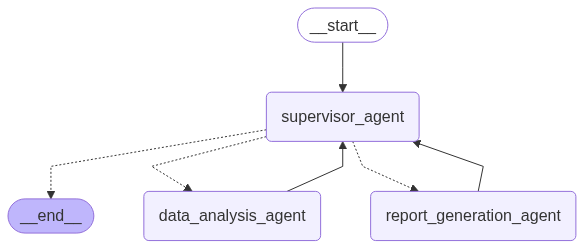

In [11]:
# Render and display the supervisor agent’s workflow as a Mermaid diagram
display(Image(supervisor_agent.get_graph().draw_mermaid_png()))

<h1 id="evaluation_of_the_multi_agent_system" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">4. Evaluation of the Multi-Agent System</h1>

To assess the performance of the data analysis multi-agent system developed in the previous section, we apply it to two datasets – Medical Costs and Diabetes Readmission Rates – by running the full system pipeline on each.

As part of the evaluation, we define a helper function that encapsulates the full pipeline: it sends a request to the supervisor agent, streams intermediate responses, extracts the final Markdown report, and saves it locally as `data_analysis_report.md`. The report is then rendered directly within the Jupyter notebook for interactive review.

In [12]:
def generate_report(example_folder: str) -> str:
    """
    Run the full analysis+report workflow for the given example directory,
    save the Markdown, and display it inline.

    Parameters:
        example_folder (str): Folder name containing 'dataset.csv', e.g. 'example_1'.

    Returns:
        str: The generated Markdown report.
    """
    # 1. Build the user instruction
    user_request = {
        "role": "user",
        "content": (
            f"Please analyze the CSV file at '{example_folder}/dataset.csv':\n"
            "1. Compute descriptive statistics, check missing values,\n"
            "   and create boxplots for numerical features and bar charts for categorical features.\n"
            "2. Look up column meanings online to provide context.\n"
            "3. Generate a comprehensive Markdown report that includes:\n"
            "   - An introduction to the dataset\n"
            "   - Column descriptions\n"
            "   - A preview of the first ten rows\n"
            "   - Commentary on missing values\n"
            "   - Interpretations of all numerical and categorical summaries\n"
            "   - Inline discussion of each boxplot and bar chart\n"
            "Return only the final Markdown report."
        )
    }

    # 2. Stream through the supervisor agent
    final_chunk = None
    for chunk in supervisor_agent.stream({"messages": [user_request]}):
        pretty_print_messages(chunk, last_message=True)
        final_chunk = chunk

    # 3. Extract the very last message (the Markdown report)
    history = convert_to_messages(final_chunk["supervisor_agent"]["messages"])
    markdown_report = history[-1].content

    # 4. Ensure output directory exists
    out_dir = example_folder
    os.makedirs(out_dir, exist_ok=True)

    # 5. Save the report to file
    output_path = os.path.join(out_dir, "data_analysis_report.md")
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(markdown_report)
    print("=" * 80)
    print(f"Report saved to '{output_path}'\n")

    # 6. Render the Markdown inline
    display(Markdown(markdown_report))

<h1 id="medical_costs_dataset_evaluation"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.1 Medical Costs Dataset Evaluation
    <a class="anchor-link"
       href="#medical_costs_dataset_evaluation"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid; margin-top: 10px;">
</h1>

We begin by downloading the [Medical Costs dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle and saving it to the `example_1` directory. This dataset contains 1,338 records and 7 features, including age, sex, BMI, smoking status, and medical charges for individuals in the U.S.

In [13]:
# Define target folder and create it if needed
example_dir = "example_1"
os.makedirs(example_dir, exist_ok=True)

# Define which file to fetch from the dataset
file_path = "insurance.csv"  # file inside the Kaggle dataset

# Load dataset into a DataFrame
df = kagglehub.load_dataset(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "mirichoi0218/insurance",
    file_path
)

# Save the dataset locally for the agent system to access
output_csv_path = os.path.join(example_dir, "dataset.csv")
df.to_csv(output_csv_path, index=False)

C:\Users\simon\AppData\Local\Temp\ipykernel_16820\496144484.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Download already complete (55628 bytes).


Once the dataset has been saved, the following code block initiates the multi-agent system pipeline to analyze the data and generate a structured Markdown report.

In [14]:
generate_report("example_1")

Update from node supervisor_agent:


================================= Tool Message =================================
Name: transfer_to_data_analysis_agent

Successfully transferred to data_analysis_agent


Update from node data_analysis_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor_agent

Successfully transferred back to supervisor_agent


Update from node supervisor_agent:


================================= Tool Message =================================
Name: transfer_to_report_generation_agent

Successfully transferred to report_generation_agent


Update from node report_generation_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor_agent

Successfully transferred back to supervisor_agent


Update from node supervisor_agent:


================================== Ai Message ==================================
Name: supervisor_agent

# In

# Introduction
This dataset is commonly referred to as the “Medical Cost Personal Dataset,” containing information about individuals’ demographics, health characteristics, and medical insurance charges. It is frequently analyzed to understand healthcare costs and risk factors in insurance domains.

Before delving into descriptive statistics, let us outline each column’s meaning, preview the first ten records, discuss missing values, and then interpret the statistical findings along with the associated plots.

---

## Column Descriptions
• age – Age of the primary beneficiary  
• sex – Gender of the beneficiary (male/female)  
• bmi – Body Mass Index, offering insight into weight status  
• children – Number of children or dependents covered  
• smoker – Indicates if the person smokes (yes/no)  
• region – Residential region in the US (northeast, northwest, southeast, southwest)  
• charges – Annual medical insurance charges (USD)  

---

## Data Preview
Below are the first ten rows of the dataset for a quick look:

| age | sex    | bmi   | children | smoker | region    | charges     |
|-----|--------|-------|----------|--------|-----------|-------------|
| 19  | female | 27.9  | 0        | yes    | southwest | 16884.924   |
| 18  | male   | 33.77 | 1        | no     | southeast | 1725.5523   |
| 28  | male   | 33.0  | 3        | no     | southeast | 4449.462    |
| 33  | male   | 22.705| 0        | no     | northwest | 21984.47061 |
| 32  | male   | 28.88 | 0        | no     | northwest | 3866.8552   |
| 31  | female | 25.74 | 0        | no     | southeast | 3756.6216   |
| 46  | female | 33.44 | 1        | no     | southeast | 8240.5896   |
| 37  | female | 27.74 | 3        | no     | northwest | 7281.5056   |
| 37  | male   | 29.83 | 2        | no     | northeast | 6406.4107   |
| 60  | female | 25.84 | 0        | no     | northwest | 28923.13692 |

---

## Missing Values Summary
All columns in this dataset are fully populated, and there are no missing entries:  
• age: 0  
• sex: 0  
• bmi: 0  
• children: 0  
• smoker: 0  
• region: 0  
• charges: 0  

This completeness is ideal for thorough and reliable analyses.

---

## Descriptive Statistics

### Numerical Columns
Below are the key statistical metrics for the numerical columns. Accompanying each table is a boxplot that illustrates the respective distribution:

1) age  
   - Count: 1338.0  
   - Mean: 39.21  
   - Std: 14.05  
   - Min: 18.0  
   - 25%: 27.0  
   - 50%: 39.0  
   - 75%: 51.0  
   - Max: 64.0  

   Boxplot:  
   ![Age Boxplot](example_1/plots/age_boxplot.png)

   Discussion:  
   The mean age sits at around 39, and the data extend from 18 to 64, showing a wide adult age range. The boxplot appears quite balanced with no significant outliers, indicating a fairly uniform coverage across different adult age groups.

2) bmi  
   - Count: 1338.0  
   - Mean: 30.66  
   - Std: 6.10  
   - Min: 15.96  
   - 25%: 26.30  
   - 50%: 30.40  
   - 75%: 34.69  
   - Max: 53.13  

   Boxplot:  
   ![BMI Boxplot](example_1/plots/bmi_boxplot.png)

   Discussion:  
   The average BMI is roughly 30.66, which borders the clinical definition of obesity. The boxplot indicates some individuals in the higher BMI range (over 40), representing severe obesity cases. Overall, the distribution skews slightly with these higher outliers.

3) children  
   - Count: 1338.0  
   - Mean: 1.09  
   - Std: 1.21  
   - Min: 0.0  
   - 25%: 0.0  
   - 50%: 1.0  
   - 75%: 2.0  
   - Max: 5.0  

   Boxplot:  
   ![Children Boxplot](example_1/plots/children_boxplot.png)

   Discussion:  
   Many policyholders have either no children, one, or two. There are fewer records with three or more children, but up to five in total. The boxplot confirms a right-skewed distribution, indicating that larger family sizes are less frequent.

4) charges  
   - Count: 1338.0  
   - Mean: 13270.42  
   - Std: 12110.01  
   - Min: 1121.87  
   - 25%: 4740.29  
   - 50%: 9382.03  
   - 75%: 16639.91  
   - Max: 63770.43  

   Boxplot:  
   ![Charges Boxplot](example_1/plots/charges_boxplot.png)

   Discussion:  
   The cost distribution has a long tail toward high values. The boxplot shows a cluster of outliers in the upper range, reflecting expensive medical interventions for some policyholders. Most charges range below $20,000, with a median close to $9,400.

---

### Categorical Columns
Next, we look at the counts of each category. Right after each table, a bar chart shows the distribution visually:

1) sex  
   - male: 676  
   - female: 662  

   Bar Chart:  
   ![Sex Bar Chart](example_1/plots/sex_barchart.png)

   Discussion:  
   The dataset has nearly equal numbers of males and females, suggesting a balanced sample for gender-based analysis and modeling.

2) smoker  
   - no: 1064  
   - yes: 274  

   Bar Chart:  
   ![Smoker Bar Chart](example_1/plots/smoker_barchart.png)

   Discussion:  
   Smokers comprise a smaller portion of the data (about 20%), which is typical of population samples. In health cost datasets, this group is often crucial because their medical expenses can be substantially higher.

3) region  
   - southeast: 364  
   - southwest: 325  
   - northwest: 325  
   - northeast: 324  

   Bar Chart:  
   ![Region Bar Chart](example_1/plots/region_barchart.png)

   Discussion:  
   Individuals come from four primary regions, each with a comparable representation. This distribution reduces geographic bias and allows the analysis of regional differences in insurance charges or health traits.

---

## Conclusion
Overall, the dataset is thorough and well-suited for modeling and analysis. It covers a wide adult age range, presents a broad spread of BMI values, and captures medical costs with clear outliers on the high end. Categorical forests show a nearly even gender split, a modest proportion of smokers, and balanced regional samples. Such features make this dataset an excellent candidate for exploring how various demographic and health-related factors influence insurance charges.

<h1 id="diabetes_readmission_rates_dataset_evaluation"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.2 Diabetes Readmission Rates Dataset Evaluation
    <a class="anchor-link"
       href="#diabetes_readmission_rates_dataset_evaluation"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid; margin-top: 10px;">
</h1>

As a second example, we apply the multi-agent system to the [Diabetes Readmission Rates dataset](https://www.kaggle.com/datasets/brandao/diabetes/), which contains 101,766 records and approximately 50 features, including demographics, lab results, diagnoses, and hospital-related data. We first download the dataset and save it in the `example_2` directory for use in the system.

In [15]:
# Download and the dataset files
download_path = kagglehub.dataset_download("brandao/diabetes")

# Define output directory and target file
example_dir = "example_2"
os.makedirs(example_dir, exist_ok=True)

# Load the dataset CSV
source_csv_path = os.path.join(download_path, "diabetic_data.csv")
df = pd.read_csv(source_csv_path)

# Save under standard filename for the multi-agent pipeline
output_csv_path = os.path.join(example_dir, "dataset.csv")
df.to_csv(output_csv_path, index=False)

100%|██████████| 4.41M/4.41M [00:00<00:00, 4.80MB/s]

Extracting files...


Once the dataset is prepared, the following code block initiates the multi-agent system pipeline to analyze the data and generate a structured Markdown report.

In [16]:
generate_report("example_2")

Update from node supervisor_agent:


================================= Tool Message =================================
Name: transfer_to_data_analysis_agent

Successfully transferred to data_analysis_agent


Update from node data_analysis_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor_agent

Successfully transferred back to supervisor_agent


Update from node supervisor_agent:


================================= Tool Message =================================
Name: transfer_to_report_generation_agent

Successfully transferred to report_generation_agent


Update from node report_generation_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor_agent

Successfully transferred back to supervisor_agent


Update from node supervisor_agent:


================================== Ai Message ==================================
Name: supervisor_agent

# In

# Introduction
This dataset, commonly referred to as the “Diabetes 130-US hospitals” dataset, comes from a large pool of patient admissions spanning the years 1999–2008 at 130 U.S. hospitals. Each record represents a hospital stay for a diabetic patient, including demographic information, diagnoses, length of stay, lab results, and medications used. This dataset is valuable for analyzing factors associated with readmissions, medication changes, and general outcomes in diabetic care.

---

## Column Descriptions
Below is an overview of each column’s meaning and context:

- **encounter_id** – Unique identifier for the encounter.  
- **patient_nbr** – Unique identifier for the patient (multiple encounters possible).  
- **race** – Patient-reported race (Caucasian, AfricanAmerican, etc.).  
- **gender** – Gender of the patient (Male, Female, or Unknown).  
- **age** – Patient’s age in 10-year intervals (e.g., [0-10), [10-20), [90-100)).  
- **weight** – Weight recorded in specific ranges (mostly missing).  
- **admission_type_id** – Numeric ID describing the admission category (e.g., emergency, urgent).  
- **discharge_disposition_id** – Numeric ID describing discharge status (home, transfer, etc.).  
- **admission_source_id** – Numeric ID describing the referral source (e.g., physician referral, emergency).  
- **time_in_hospital** – Number of days between admission and discharge (1–14).  
- **payer_code** – Payment source (e.g., Medicare, Medicaid, private insurance).  
- **medical_specialty** – Primary specialty of the attending physician (e.g., InternalMedicine).  
- **num_lab_procedures** – Number of lab tests performed during the encounter.  
- **num_procedures** – Number of non-lab procedures performed.  
- **num_medications** – Number of distinct medications administered.  
- **number_outpatient** – Count of prior outpatient visits within one year.  
- **number_emergency** – Count of prior emergency visits within one year.  
- **number_inpatient** – Count of prior inpatient visits within one year.  
- **diag_1** – Primary diagnosis (ICD-9 code).  
- **diag_2** – Secondary diagnosis (ICD-9 code).  
- **diag_3** – Tertiary diagnosis (ICD-9 code).  
- **number_diagnoses** – Number of diagnoses on record for the encounter.  
- **max_glu_serum** – Indicates glucose serum measurement range (>200, >300, Normal, or none).  
- **A1Cresult** – Shows A1C test results (>7, >8, Normal, or none).  
- **metformin, repaglinide, …, insulin** – Prescription status (No, Steady, Up, Down) of various diabetic medications.  
- **change** – Indicates whether the diabetes medication dosage was changed during the encounter.  
- **diabetesMed** – Indicates whether any diabetes medication was prescribed during the encounter.  
- **readmitted** – Readmission status: “<30” (within 30 days), “>30” (after 30 days), or “NO” (no readmission).

---

## Data Preview
Below are the first 10 rows from the dataset:

| encounter_id | patient_nbr | race             | gender | age      | weight | admission_type_id | discharge_disposition_id | admission_source_id | time_in_hospital | payer_code | medical_specialty         | num_lab_procedures | num_procedures | num_medications | number_outpatient | number_emergency | number_inpatient | diag_1   | diag_2    | diag_3   | number_diagnoses | max_glu_serum | A1Cresult | metformin | repaglinide | nateglinide | chlorpropamide | glimepiride | acetohexamide | glipizide  | glyburide | tolbutamide | pioglitazone | rosiglitazone | acarbose | miglitol | troglitazone | tolazamide | examide | citoglipton | insulin | glyburide-metformin | glipizide-metformin | glimepiride-pioglitazone | metformin-rosiglitazone | metformin-pioglitazone | change | diabetesMed | readmitted |
|--------------|-------------|------------------|--------|----------|--------|-------------------|-------------------------|---------------------|------------------|-----------|---------------------------|--------------------|---------------|-----------------|------------------|-----------------|-----------------|----------|-----------|----------|------------------|--------------|----------|-----------|------------|------------|----------------|------------|---------------|------------|-----------|-------------|-------------|---------------|---------|----------|--------------|-----------|--------|-------------|---------|---------------------|--------------------|---------------------------|-------------------------|-------------------------|--------|------------|-----------|
| 2278392      | 8222157     | Caucasian        | Female | [0-10)   | ?      | 6                 | 25                      | 1                   | 1                | ?         | Pediatrics-Endocrinology | 41                 | 0             | 1               | 0                | 0               | 0               | 250.83   | ?         | ?        | 1                |              |          | No        | No         | No         | No             | No         | No            | No         | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | No      | No                  | No                 | No                        | No                      | No                      | No     | No         | NO        |
| 149190       | 55629189    | Caucasian        | Female | [10-20)  | ?      | 1                 | 1                       | 7                   | 3                | ?         | ?                         | 59                 | 0             | 18              | 0                | 0               | 0               | 276      | 250.01    | 255      | 9                |              |          | No        | No         | No         | No             | No         | No            | No         | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Up      | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | >30       |
| 64410        | 86047875    | AfricanAmerican  | Female | [20-30)  | ?      | 1                 | 1                       | 7                   | 2                | ?         | ?                         | 11                 | 5             | 13              | 2                | 0               | 1               | 648      | 250       | V27      | 6                |              |          | No        | No         | No         | No             | No         | No            | Steady    | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | No      | No                  | No                 | No                        | No                      | No                      | No     | Yes        | NO        |
| 500364       | 82442376    | Caucasian        | Male   | [30-40)  | ?      | 1                 | 1                       | 7                   | 2                | ?         | ?                         | 44                 | 1             | 16              | 0                | 0               | 0               | 8        | 250.43    | 403      | 7                |              |          | No        | No         | No         | No             | No         | No            | No         | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Up      | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | NO        |
| 16680        | 42519267    | Caucasian        | Male   | [40-50)  | ?      | 1                 | 1                       | 7                   | 1                | ?         | ?                         | 51                 | 0             | 8               | 0                | 0               | 0               | 197      | 157       | 250      | 5                |              |          | No        | No         | No         | No             | No         | No            | Steady    | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Steady  | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | NO        |
| 35754        | 82637451    | Caucasian        | Male   | [50-60)  | ?      | 2                 | 1                       | 2                   | 3                | ?         | ?                         | 31                 | 6             | 16              | 0                | 0               | 0               | 414      | 411       | 250      | 9                |              |          | No        | No         | No         | No             | No         | No            | No         | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Steady  | No                  | No                 | No                        | No                      | No                      | No     | Yes        | >30       |
| 55842        | 84259809    | Caucasian        | Male   | [60-70)  | ?      | 3                 | 1                       | 2                   | 4                | ?         | ?                         | 70                 | 1             | 21              | 0                | 0               | 0               | 414      | 411       | V45      | 7                |              |          | Steady    | No         | No         | No             | Steady    | No            | No         | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Steady  | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | NO        |
| 63768        | 114882984   | Caucasian        | Male   | [70-80)  | ?      | 1                 | 1                       | 7                   | 5                | ?         | ?                         | 73                 | 0             | 12              | 0                | 0               | 0               | 428      | 492       | 250      | 8                |              |          | No        | No         | No         | No             | No         | No            | No         | Steady   | No          | No          | No            | No       | No       | No           | No        | No     | No          | No      | No                  | No                 | No                        | No                      | No                      | No     | Yes        | >30       |
| 12522        | 48330783    | Caucasian        | Female | [80-90)  | ?      | 2                 | 1                       | 4                   | 13               | ?         | ?                         | 68                 | 2             | 28              | 0                | 0               | 0               | 398      | 427       | 38       | 8                |              |          | No        | No         | No         | No             | No         | No            | Steady    | No        | No          | No          | No            | No       | No       | No           | No        | No     | No          | Steady  | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | NO        |
| 15738        | 63555939    | Caucasian        | Female | [90-100) | ?      | 3                 | 3                       | 4                   | 12               | ?         | InternalMedicine          | 33                 | 3             | 18              | 0                | 0               | 0               | 434      | 198       | 486      | 8                |              |          | No        | No         | No         | No             | No         | No            | No         | No        | No          | No          | Steady        | No       | No       | No           | No        | No     | No          | Steady  | No                  | No                 | No                        | No                      | No                      | Ch     | Yes        | NO        |

*(Note: “?” indicates a missing or unknown value; a null entry under max_glu_serum or A1Cresult means not measured.)*

---

## Missing Values Summary
Below is the count of missing values among selected columns:

- **max_glu_serum**: 96,420 missing  
- **A1Cresult**: 84,748 missing  
- **weight**: 98,569 missing  

Most essential demographic and numeric columns have complete data. However, lab-related fields (max_glu_serum, A1Cresult) and weight are frequently missing, which could impact models needing these predictors.

---

## Descriptive Statistics

### Numerical Columns

Below is a summary of the numeric features:

| Column               | Count     | Mean      | Std Dev  | Min   | 25%       | 50%    | 75%       | Max   |
|----------------------|-----------|----------:|---------:|------:|----------:|-------:|----------:|------:|
| time_in_hospital     | 101,766   | 4.40      | 2.99     | 1     | 2         | 4      | 6         | 14    |
| num_lab_procedures   | 101,766   | 43.10     | 19.67    | 1     | 31        | 44     | 57        | 132   |
| num_procedures       | 101,766   | 1.34      | 1.70     | 0     | 0         | 1      | 2         | 6     |
| num_medications      | 101,766   | 16.02     | 8.13     | 1     | 10        | 15     | 20        | 81    |
| number_outpatient    | 101,766   | 0.37      | 1.27     | 0     | 0         | 0      | 0         | 42    |
| number_emergency     | 101,766   | 0.20      | 0.93     | 0     | 0         | 0      | 0         | 76    |
| number_inpatient     | 101,766   | 0.64      | 1.26     | 0     | 0         | 0      | 1         | 21    |
| number_diagnoses     | 101,766   | 7.42      | 1.93     | 1     | 6         | 8      | 9         | 16    |

Immediately below are the boxplots for each of these numerical columns, which help visualize their distributions and potential outliers:

- ![time_in_hospital](example_2/plots/time_in_hospital_boxplot.png)  
  Most visits are short (1–6 days) with a maximum of 14 days, so we see a relatively narrow distribution.

- ![num_lab_procedures](example_2/plots/num_lab_procedures_boxplot.png)  
  The majority of patients have between about 31 and 57 lab tests. The mean is around 43, suggesting moderate testing for most admissions.

- ![num_procedures](example_2/plots/num_procedures_boxplot.png)  
  Typically, 0–2 procedures; only a minority have more than 2, which indicates some admissions required more intensive intervention.

- ![num_medications](example_2/plots/num_medications_boxplot.png)  
  The average is 16 medications, but many cluster between 10 and 20. A small subset receives notably more, reflecting complex cases or multiple comorbidities.

- ![number_outpatient](example_2/plots/number_outpatient_boxplot.png), ![number_emergency](example_2/plots/number_emergency_boxplot.png), ![number_inpatient](example_2/plots/number_inpatient_boxplot.png)  
  Most patients have no prior outpatient, emergency, or inpatient visits, indicating many single or first-time admissions. A few frequent healthcare utilizers have high counts.

- ![number_diagnoses](example_2/plots/number_diagnoses_boxplot.png)  
  Patients commonly have around 6–9 diagnoses, reflecting the complexity of diabetic patients often presenting multiple comorbidities.

### Interpretation
Most admissions in the dataset are relatively short hospital stays, with moderate lab testing and medication usage. The outliers in admissions, lab procedures, or prior visits highlight patients who have substantially more complex care paths, possibly due to multiple comorbidities or repeated hospital use.

---

## Categorical Columns

Below is a look at a few key categorical columns. These are the largest categories:

- **race**: 76,099 Caucasian, 19,210 AfricanAmerican, followed by smaller groups (Hispanic, Asian, Other).  
- **gender**: 54,708 Female, 47,055 Male, and 3 unknown/invalid.  
- **age**: The most common brackets are [70-80), [60-70), [50-60), and [80-90).  
- **weight**: Over 98,000 unknown (“?”), with only a small fraction recorded.  
- **change**: 54,755 records show “No” change, while 47,011 indicate a medication dosage change.  
- **diabetesMed**: 78,363 indicate “Yes” for diabetes medication prescriptions, 23,403 are “No.”  
- **readmitted**: 54,864 “NO,” 35,545 “>30,” 11,357 “<30.”

Below are bar charts illustrating distributions of several major categorical features:

- ![race](example_2/plots/race_barchart.png)  
  Caucasian is clearly the largest group, followed by AfricanAmerican. Gaps may reflect underlying population demographics or differences in healthcare access.

- ![gender](example_2/plots/gender_barchart.png)  
  Slightly more females than males in the dataset.

- ![age](example_2/plots/age_barchart.png)  
  Older age brackets dominate hospital admissions, consistent with the chronic nature of diabetes.

- ![weight](example_2/plots/weight_barchart.png)  
  Virtually all are unknown (“?”), underscoring the scarcity of weight data.

- ![change](example_2/plots/change_barchart.png)  
  A substantial subset of patients (surprisingly close to half) had medication dosage changes during their stay.

- ![diabetesMed](example_2/plots/diabetesMed_barchart.png)  
  Most patients did receive a diabetes medication, typical in a diabetic cohort.

- ![readmitted](example_2/plots/readmitted_barchart.png)  
  “NO” is the most common outcome, though a significant portion is readmitted (>30 or <30 days), warranting analysis into potential drivers of readmission.

### Interpretation
Demographically, the dataset is skewed toward older populations, primarily Caucasian, and includes many patients who consistently require diabetes management. The high proportion of medication changes indicates dynamic treatment approaches. The readmission patterns highlight potential needs for better follow-up and care coordination.

---

## Conclusion
Overall, this dataset offers a detailed snapshot of diabetic patients hospitalized in various U.S. hospitals. Numerical columns show diverse lengths of stay, varying intensities of lab and medical procedures, and the frequent presence of multiple comorbidities. Categorical data reveals an older patient distribution, with race and gender distributions reflective of broader demographic patterns. Missing data is notable primarily for weight and certain lab measures (A1C, max glucose serum), so analyses involving these features require careful imputation or restricted inclusion. The dataset thus provides a rich foundation for investigating diabetes care outcomes and the factors that contribute to readmissions.